In [2]:
#Importing the Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)


In [3]:
#Preprosessing the Data
dataX = pd.read_csv("C:/Vinothkumar/BiTS/2nd Sem/Intro to Data Science/Assignment/dataforassignment/linearX.csv")
dataY = pd.read_csv("C:/Vinothkumar/BiTS/2nd Sem/Intro to Data Science/Assignment/dataforassignment/linearY.csv")

In [4]:
print(dataX)
print(dataY)

     9.1
0    8.0
1    9.1
2    8.4
3    6.9
4    7.7
..   ...
94   7.8
95  10.2
96   6.1
97   7.3
98   7.3

[99 rows x 1 columns]
    0.99523
0   0.99007
1   0.99769
2   0.99386
3   0.99508
4   0.99630
..      ...
94  0.99620
95  0.99760
96  0.99464
97  0.99830
98  0.99670

[99 rows x 1 columns]


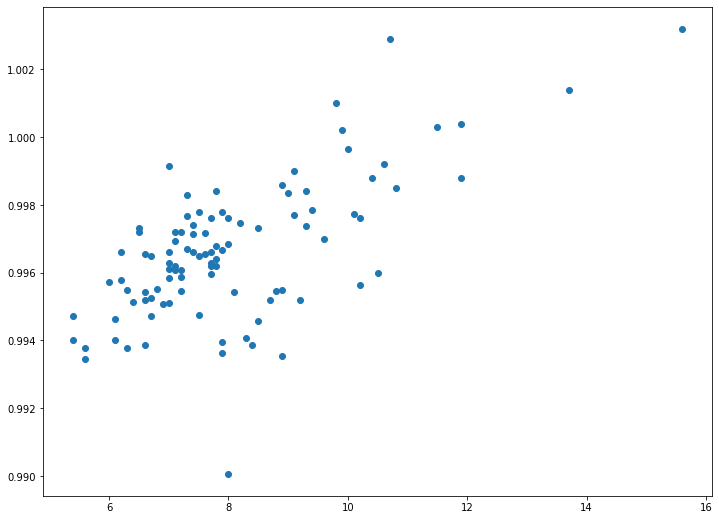

In [5]:
X = dataX.iloc[:, 0]
Y = dataY.iloc[:, 0]
plt.scatter(X,Y)
plt.show()

In [6]:
# Building the model
def normalize(x):
    mu = np.mean(x)
    std = np.std(x)
    
    apply = np.vectorize(lambda z: (z - mu) / std)
    return apply(x)

def read_data(xf, yf, delimiter=','):
    x = np.loadtxt(xf, delimiter=delimiter)

    try:
        m, n = x.shape[0], x.shape[1]
    except IndexError:
        m, n = (x.shape[0], 1)

    # The intercept term
    x0 = np.ones(m)

    # Normalization
    x = normalize(x)

    X = np.c_[x0, x]
    y = np.loadtxt(yf)
    
    return X, y, m, n

def plot_hypothesis(X, y, theta):
    plt.plot(X[:,1], y, 'rx')
    plt.plot(X[:,1], list(map(lambda x: theta @ x, X)), 'b')

In [23]:
##X, y, m, n = read_data("C:/Vinothkumar/BiTS/2nd Sem/Intro to Data Science/Assignment/dataforassignment/linearX.csv", "C:/Vinothkumar/BiTS/2nd Sem/Intro to Data Science/Assignment/dataforassignment/linearY.csv")

X, y, m, n = (dataX,dataY)
def J(theta):
    return np.sum((X @ theta - y) ** 2) / (2)

# Store points to plot later
error_plot_points = []

# Theta - the prameters we are looking for
# Intialized to a vector of all zeros
theta = np.zeros(n+1)

# The learning rate
eta = 0.001

# Count the number of iterations it took for convergence
iters = 0

# Error at zero theta
Jn = J(theta)
converged = False

print("Learning Rate: ", eta)
print("Initial Error: ", Jn)

while (not converged):
# for _ in range(10):
    theta = theta - eta * (X @ theta - y) @ X

    # Calculate new error and check convergence
    Jp = Jn
    Jn = J(theta)

    if (iters % 5) == 0:
        error_plot_points.append((theta, Jn))
    
    if Jp - Jn < 10 ** -15:
        converged = True
        
    iters += 1
     

print("Final Error: ", Jn)
print("Number of iterations: ", iters)
print("Parameters: ", theta)


ValueError: not enough values to unpack (expected 4, got 2)

Plotting the Hypothesis

[0.99662009 0.0013402 ]


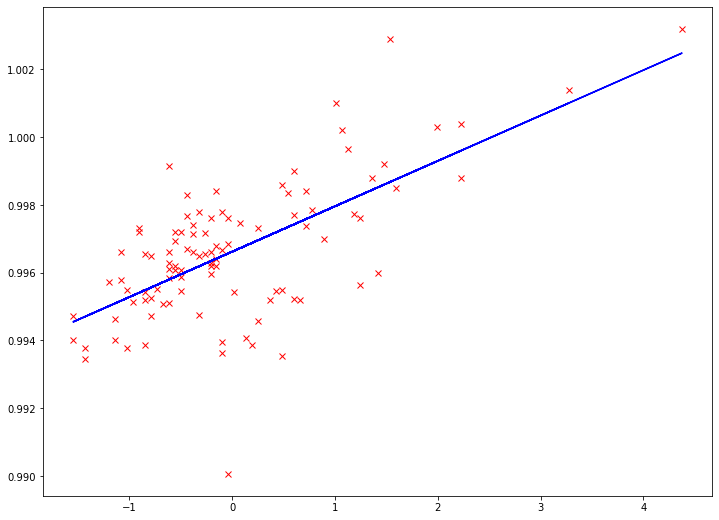

In [22]:
print(theta)
plot_hypothesis(X, y, theta)